# Aula 8 - Modelagem de sistemas mecânicos
## Sistema massa-mola-amortecedor

Importando as bibliotecas

In [1]:
import sympy as sp
%matplotlib inline

### Definição do sistema

- `m` - massa
- `k` - rigidez da mola
- `c` - amortecimento
- `l0` - comprimento livre da mola
- `xp` - posição da parede em relação à massa

In [2]:
m = 10
k = 2
c = 0.1*2*sp.sqrt(k*m)
l0 = 1.1
xp = -1.0

Cálculo de propriedades dinâmicas

In [3]:
wn = sp.sqrt(k/m)
zeta = c / (2*wn*m)

In [4]:
print(wn)

0.447213595499958


In [5]:
print(zeta)
if zeta > 1:
    print('Sistema superamortecido')
elif zeta ==1:
    print('Sistema criticamente amortecido')
else:
    print('Sistema subamortecido')

0.0447213595499958*sqrt(5)
Sistema subamortecido


#### Função para plotar os gráficos
A seguir, definimos uma função para facilitar os gráficos

In [6]:
def grafs(f):
    return sp.plot(f,(t,0,40),
                   adaptive=False,
                   nb_of_points=400,
                  xlabel='Tempo/s',
                  ylabel='Posição/m')

### Definição da função de transferência do sistema

$G(s) = \frac{X(s)}{F(s)} = \frac{1/m}{s^2 + 2\zeta\omega_n s + \omega_n^2}$

é a função de transferência do sistema

In [7]:
s = sp.Symbol('s')
t = sp.Symbol('t',real=True,positive=True)

G = (1/m)/(s**2 + 2*zeta*wn*s + wn**2)
# mostra G:
G

0.1/(s**2 + 0.04*sqrt(5)*s + 0.2)

### Resposta ao impulso unitário

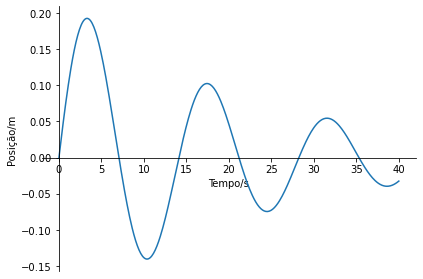

In [8]:
Xd = G
xd = sp.inverse_laplace_transform(Xd,s,t)
grafs(xd)

### Resposta ao degrau unitário

In [9]:
Xu = G * 1/s
Xu
Xu=sp.nsimplify(Xu)

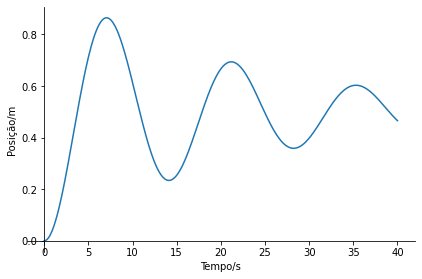

In [10]:
xu = sp.inverse_laplace_transform(Xu,s,t)
grafs(xu)

### Resposta a entrada senoidal

Vamos usar uma entrada em forma de cosseno para garantir que $f(0) = 0$.

In [11]:
w0 = 1.4*wn
Xs = G * s/(s**2+w0**2)
Xs = sp.nsimplify(Xs)

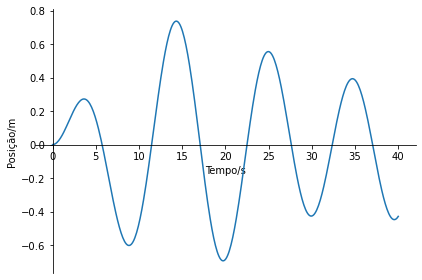

In [12]:
xs = sp.inverse_laplace_transform(Xs,s,t)
grafs(xs)

### Resposta a uma força qualquer

A força que age no sistema tem uma parte constante e uma parte variável.

$f(t) = f_0 + f_v(t)$

A parte constante vem da pré-carga da mola.

$f_0 = k \left(x_p+l_0\right)$

In [13]:
w0 = 1.0*wn
f0 = k*(xp+l0)
fv = 0.2*sp.cos(w0*t)

def Force(fconst,fvar):
    '''
    Definição da função força
    '''
    return sp.laplace_transform(fv+f0,t,s,noconds=True)


F = Force(f0,fv)
F.apart()

0.2*s/(1.0*s**2 + 0.2) + 0.2/s

Vamos verificar a resposta do sistema a essa entrada.

In [14]:
Xf = G * F
Xf = sp.nsimplify(Xf)
Xf.apart()

-(25*s + 26*sqrt(5))/(10*(25*s**2 + sqrt(5)*s + 5)) + sqrt(5)/(2*(5*s**2 + 1)) + 1/(10*s)

Resposta no tempo:

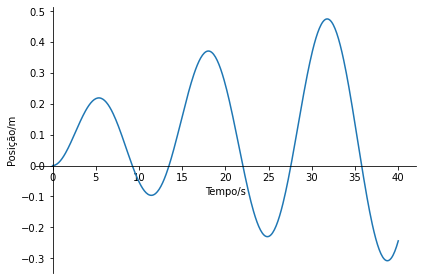

In [15]:
xf = sp.inverse_laplace_transform(Xf,s,t)
grafs(xf)

### Resultado para frequência de entrada variável

Agora vamos analisar o que acontece quando mudamos a frequência da excitação

In [20]:
w0 = [0.8,0.9,1.0,1.1,1.2]

p = sp.plot(0,show=False,legend=True)
for w in w0:
    F1 = sp.laplace_transform(f0+0.2*sp.cos(w*wn*t),t,s,noconds=True)
    X = G * F1
    X = sp.nsimplify(X)
    x = sp.inverse_laplace_transform(X,s,t)
    p.append(sp.plot(x,(t,0,100),
                     adaptive=False,
                     nb_of_points=400,
                     show=False,
                     label=str(w))[0])

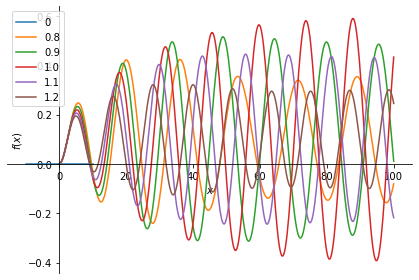

In [21]:
p.show()

In [18]:
B=(G*(s/(s**2+wn**2))).nsimplify()
b = sp.inverse_laplace_transform(B,s,t)

In [19]:
b

5*sin(sqrt(5)*t/5)/2 - 25*sqrt(11)*exp(-sqrt(5)*t/50)*sin(3*sqrt(55)*t/50)/33